In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
os.chdir("../input")
os.listdir()

data = pd.read_csv("crime.csv",encoding = 'unicode_escape')
data.shape
# Any results you write to the current directory are saved as output.

['crime.csv']


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(327820, 17)

In [2]:
#average crimes occuring every year, month and each day.
Yeardf=data.groupby('YEAR').size().reset_index(name='countperYr')
Yeardf['avgCrimes']=Yeardf.countperYr.map(lambda x: (x/12,x/365,x/(365*24)))
Yeardf[['CrimesPerYr','CrimesPerMnth','CrimesPerDay']]=pd.DataFrame(Yeardf['avgCrimes'].tolist())
Yeardf

,YEAR,countperYr,avgCrimes,CrimesPerYr,CrimesPerMnth,CrimesPerDay
0,2015,53392,"(4449.333333333333, 146.27945205479452, 6.0949...",4449.333333,146.279452,6.094977
1,2016,99134,"(8261.166666666666, 271.6, 11.316666666666666)",8261.166667,271.600000,11.316667
2,2017,100938,"(8411.5, 276.54246575342466, 11.522602739726027)",8411.500000,276.542466,11.522603
3,2018,74356,"(6196.333333333333, 203.71506849315068, 8.4881...",6196.333333,203.715068,8.488128


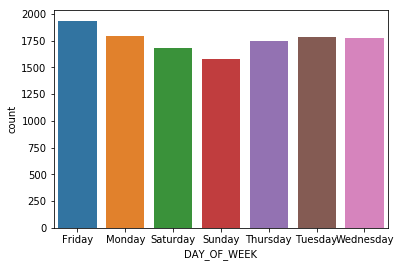

In [3]:

#Number of crimes on Robbery/Burglary occured on all week days
robbery=data[data['OFFENSE_CODE_GROUP'].str.contains("Robbery|BURGLARY", na=False,case=False)].groupby(['DAY_OF_WEEK']).size().reset_index(name='count')
sns.barplot(x = "DAY_OF_WEEK",     
            y= "count",        
            data=robbery
            )

In [4]:
#Highest number of incidents for a particular crime occured in each year
data.groupby(['OFFENSE_CODE_GROUP','YEAR']).size().reset_index(name='count').sort_values(by=['count'], ascending=False)



,OFFENSE_CODE_GROUP,YEAR,count
159,Motor Vehicle Accident Response,2017,12049
158,Motor Vehicle Accident Response,2016,11534
160,Motor Vehicle Accident Response,2018,8724
124,Larceny,2016,7903
147,Medical Assistance,2017,7817
125,Larceny,2017,7812
146,Medical Assistance,2016,6978
113,Investigate Person,2017,6659
148,Medical Assistance,2018,6292
126,Larceny,2018,5949


In [5]:
#splitting the day into 'midnight','morning','afternoon','evening'
data['period']= pd.cut( data.HOUR,
                          [0,6,12,18,23],
                          labels=['midnight','morning','afternoon','evening'],
                          include_lowest=True
                          )
data['period']

0           evening
1           evening
2           evening
3           evening
4           evening
5           evening
6           evening
7           evening
8           evening
9           evening
10          evening
11          evening
12        afternoon
13          morning
14          evening
15          evening
16        afternoon
17          evening
18        afternoon
19        afternoon
20          evening
21          evening
22        afternoon
23        afternoon
24        afternoon
25         midnight
26          evening
27        afternoon
28         midnight
29          evening
            ...    
327790      evening
327791      evening
327792      morning
327793      morning
327794     midnight
327795     midnight
327796      evening
327797      evening
327798      evening
327799    afternoon
327800    afternoon
327801      morning
327802      morning
327803    afternoon
327804    afternoon
327805    afternoon
327806     midnight
327807     midnight
327808      morning


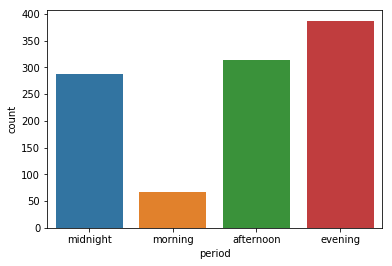

In [6]:
#to find out the highest number of shootings occuring in a particular period.
shooting=data.loc[data['SHOOTING']=='Y'].groupby('period').size().reset_index(name='count')
sns.barplot(x = "period",     
            y= "count",        
            data=shooting
            )

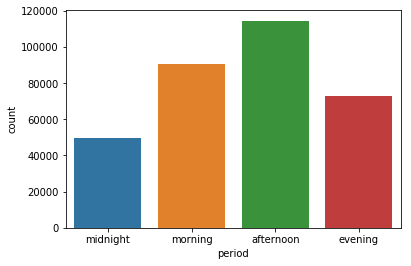

In [7]:
#to find out the highest number of crimes occuring in a particular period.
period=data.groupby('period').size().reset_index(name='count')
sns.barplot(x = "period",     
            y= "count",        
            data=period
            )

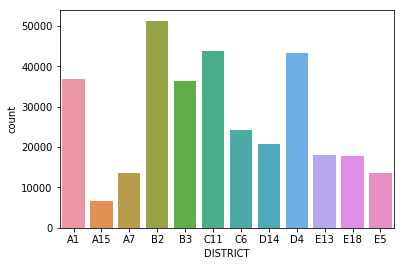

In [8]:
#which district have less number of crimes
district=data.groupby(['DISTRICT']).size().reset_index(name='count')
sns.barplot(x = "DISTRICT",     
            y= "count",        
            data=district
            )

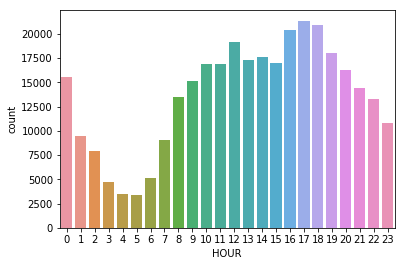

In [9]:

#what is the total number of crimes occured in each hour of a day
sns.countplot('HOUR',data= data)